In [69]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

In [70]:
# Define the paths to your image folders
train_path = 'C:\\Users\\nitch\\Downloads\\GurNum-20230429T075949Z-001\\GurNum'
val_path = 'C:\\Users\\nitch\\Downloads\\GurNum-20230429T075949Z-001\\GurNum'

In [71]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path

# Set the image size
img_size = (32, 32)

# Create empty lists for the images and labels
images = []
labels = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
    
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, str(file))
        
        # Load the image and resize it to the desired size
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size)
        # Append the image and label to the lists
        images.append(img)
        labels.append(label)
        
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)


In [72]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path

# Set the image size
img_size_val = (32, 32)

# Create empty lists for the images and labels
images_val = []
labels_val = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir_val, 'val', str(label))

     # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)    
        # Load the image and resize it to the desired size
        img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, img_size_val)
        
        # Append the image and label to the lists
        images_val.append(img)
        labels_val.append(label)
        
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)

# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

In [73]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')

In [74]:
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


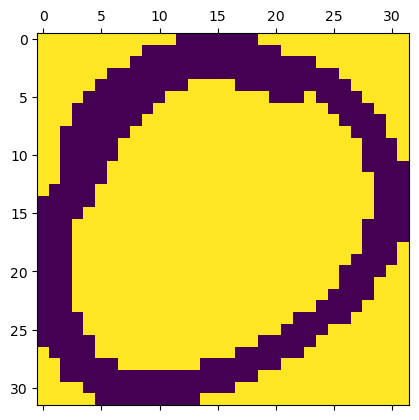

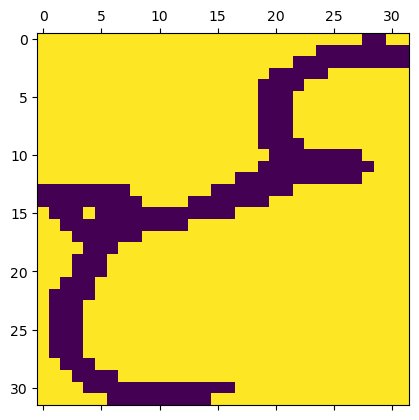

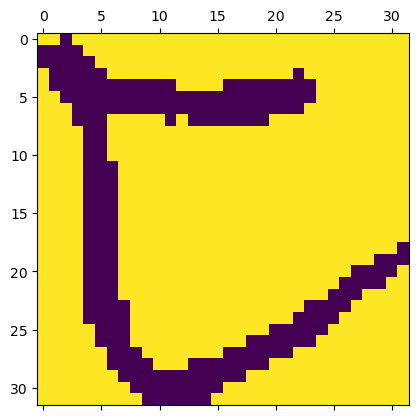

In [75]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [76]:
# # flatten the dataset i.e, change 2D to 1D (skipped this , and flattened in the model)
# x_train_flat = x_train.reshape(len(x_train),32*32)
# x_test_flat = x_test.reshape(len(x_test),32*32)
# print(x_train_flat.shape)
# print(x_test_flat.shape)
# x_train_flat[0]

In [77]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 16ms/step - loss: 120.8936 - accuracy: 0.4380 - val_loss: 49.5423 - val_accuracy: 0.5899
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 24.6056 - accuracy: 0.8070 - val_loss: 43.0332 - val_accuracy: 0.6798
Epoch 3/10
32/32 [==============================] - 0s 4ms/step - loss: 12.9375 - accuracy: 0.8820 - val_loss: 29.5280 - val_accuracy: 0.7697
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 8.3387 - accuracy: 0.9060 - val_loss: 37.4577 - val_accuracy: 0.7584
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 6.6556 - accuracy: 0.9210 - val_loss: 23.6879 - val_accuracy: 0.8315
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 6.4483 - accuracy: 0.9340 - val_loss: 24.2973 - val_accuracy: 0.8146
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 4.6284 - accuracy: 0.9460 - val_loss: 15.0847 - val_accuracy: 0.8596
Epoch 8/

In [78]:
# Observation : we see a better accuracy from the 2nd iteration

In [79]:
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 14ms/step - loss: 0.7308 - accuracy: 0.9440 - val_loss: 0.9550 - val_accuracy: 0.8652
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7304 - accuracy: 0.9350 - val_loss: 0.9271 - val_accuracy: 0.8989
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7041 - accuracy: 0.9650 - val_loss: 0.9064 - val_accuracy: 0.9270
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6853 - accuracy: 0.9800 - val_loss: 0.8921 - val_accuracy: 0.9213
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6715 - accuracy: 0.9880 - val_loss: 0.8815 - val_accuracy: 0.9326
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6608 - accuracy: 0.9930 - val_loss: 0.8733 - val_accuracy: 0.9382
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6520 - accuracy: 0.9950 - val_loss: 0.8665 - val_accuracy: 0.9326
Epoch 8/10
32/32 [=

In [80]:
# Observation : we got better result for all iterations on scaling the training dataset

In [81]:
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.8487 - accuracy: 0.9270


[0.8486843109130859, 0.9269663095474243]

In [82]:
# Observation : result almost same as the training dataset

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


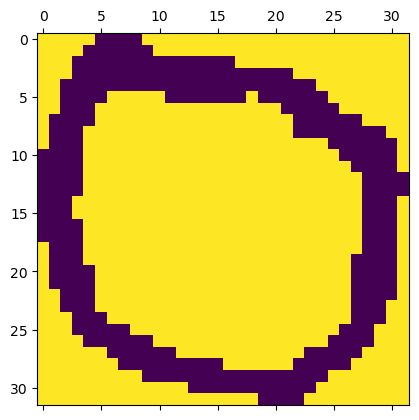

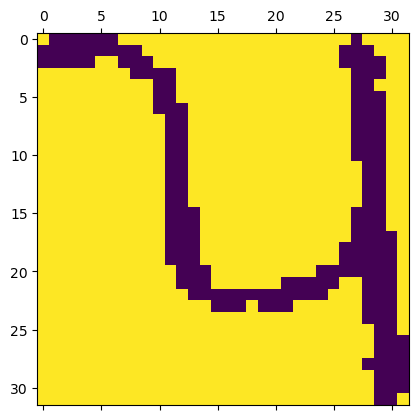

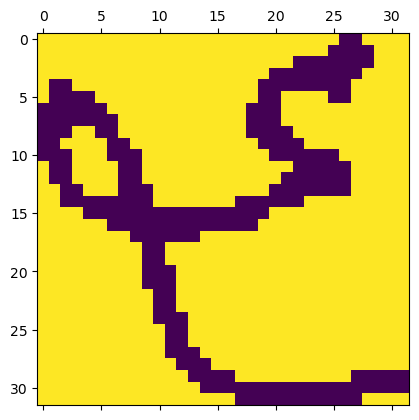

In [83]:
# predict 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [84]:
# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 2, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 7, 5, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 6, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0, 15,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0, 16,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1, 15,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0, 19]])>

Text(95.72222222222221, 0.5, 'Actual')

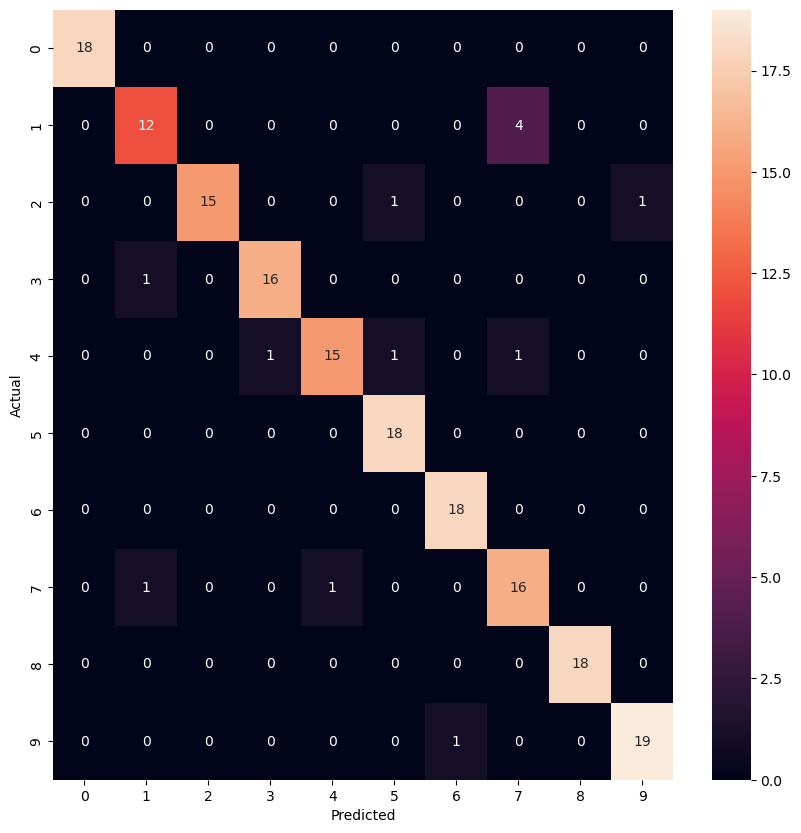

In [85]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [86]:
# here we can see there are some errors
# we need to modify our nn, we add some layers in the above model and different activation function

In [87]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# compile the nn
model2.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 2s 29ms/step - loss: 0.9943 - accuracy: 0.7290 - val_loss: 0.4671 - val_accuracy: 0.8427
Epoch 2/10
32/32 [==============================] - 1s 18ms/step - loss: 0.1689 - accuracy: 0.9510 - val_loss: 0.3774 - val_accuracy: 0.9101
Epoch 3/10
32/32 [==============================] - 1s 19ms/step - loss: 0.1213 - accuracy: 0.9580 - val_loss: 0.3221 - val_accuracy: 0.9157
Epoch 4/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0797 - accuracy: 0.9790 - val_loss: 0.2433 - val_accuracy: 0.9382
Epoch 5/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0517 - accuracy: 0.9850 - val_loss: 0.2122 - val_accuracy: 0.9494
Epoch 6/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0354 - accuracy: 0.9900 - val_loss: 0.2258 - val_accuracy: 0.9494
Epoch 7/10
32/32 [==============================] - 1s 19ms/step - loss: 0.0371 - accuracy: 0.9870 - val_loss: 0.2433 - val_accuracy: 0.9494
Epoch 8/10
32

In [88]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 6ms/step - loss: 0.2005 - accuracy: 0.9551


[0.20051471889019012, 0.9550561904907227]

In [89]:
# Earlier we got 0.9213483333587646 now we got 0.9606741666793823 accuracy# redo the confusion matrix

# build confusion matrix to see how our prediction looks like

# convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]

y_predicted_labels=[np.argmax(i) for i in y_predicted]

print(y_predicted_labels, len(y_predicted_labels))

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 6ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0, 14,  1,  1,  1,  0,  0,  0,  0],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

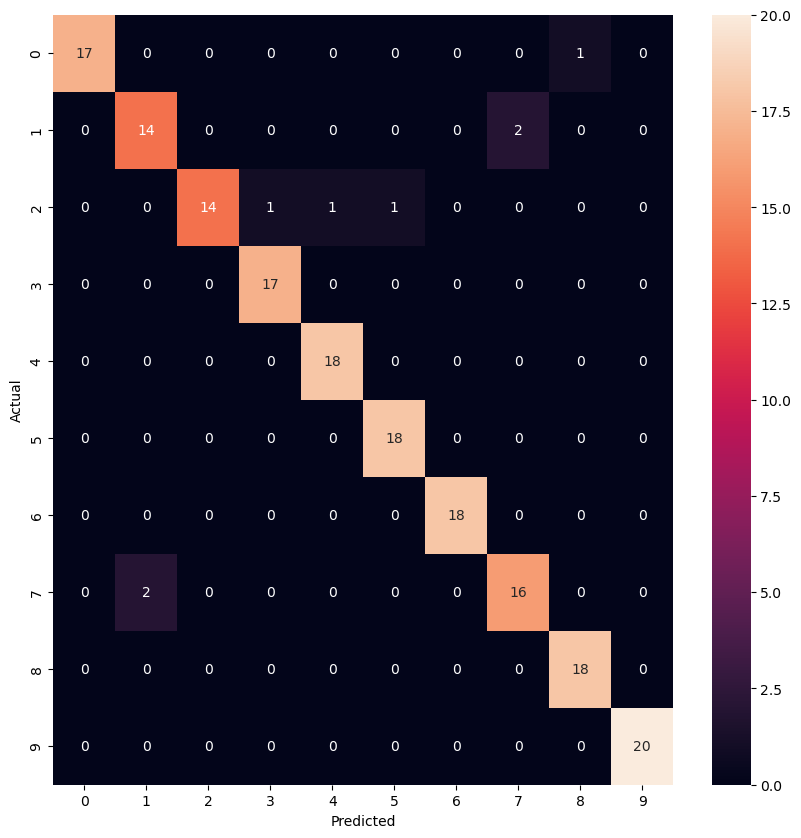

In [90]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [91]:
# Observatoin : we see in the updated model, there are less number of errors,
# whatever is not in diagonal is a error

6/6 [==============================] - 0s 4ms/step - loss: 9.5293 - accuracy: 0.9382
Test accuracy: 0.9382022619247437


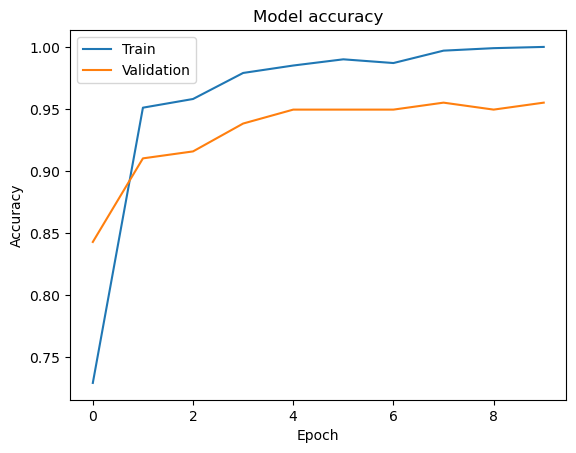

In [92]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()